# 🧠 Exploración de la estructura de la base de datos `ixorigue`

Este notebook analiza la **estructura de las tablas y columnas** en la base de datos `ixorigue`, partiendo del archivo CSV exportado con:

```sql
SELECT table_name, column_name, data_type
FROM information_schema.columns
WHERE table_schema = 'public'
ORDER BY table_name, ordinal_position;


In [3]:
import pandas as pd

ruta_csv = r"C:\1_IXORIGUE\1_Proyectos\0_K8S\data\raw\estructura_columnas_ixorigue.csv"
df = pd.read_csv(ruta_csv)

df.head()


,table_name,column_name,data_type
0,AnimalAnimalHealthEvent,AnimalHealthEventsId,uuid
1,AnimalAnimalHealthEvent,AnimalsId,uuid
2,AnimalEarTags,EarTag,character varying
3,AnimalEarTags,RanchId,uuid
4,AnimalEarTags,CreatedBy,uuid


In [4]:
print(f"🔢 Número total de columnas: {len(df)}")
print(f"📂 Número de tablas únicas: {df['table_name'].nunique()}")
print(f"🔠 Tipos de datos únicos: {df['data_type'].nunique()}")

df['data_type'].value_counts()



🔢 Número total de columnas: 547
📂 Número de tablas únicas: 46
🔠 Tipos de datos únicos: 17


data_type
uuid                        117
timestamp with time zone     69
character varying            65
boolean                      56
USER-DEFINED                 50
bigint                       46
numeric                      39
double precision             29
integer                      28
date                         12
text                         11
name                         10
ARRAY                         6
jsonb                         5
oid                           2
macaddr8                      1
smallint                      1
Name: count, dtype: int64

## 🧾 Tablas con mayor número de columnas
¿Cuáles son las tablas más complejas?


<Axes: title={'center': 'Top 10 tablas por nº de columnas'}, ylabel='table_name'>

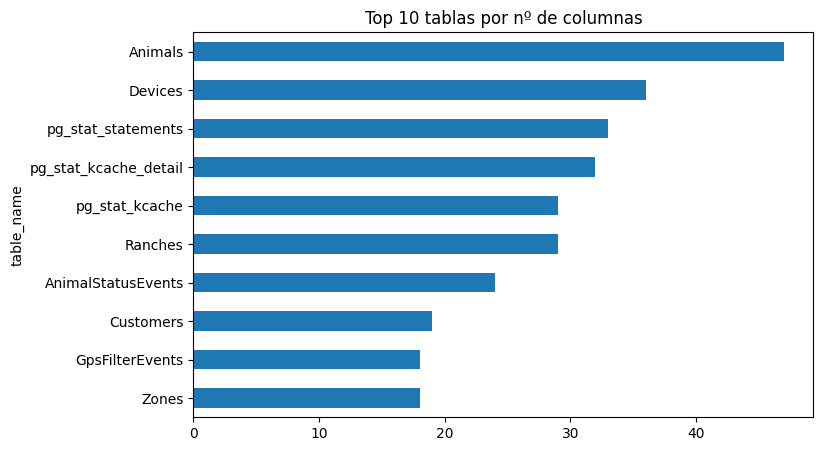

In [5]:
df['table_name'].value_counts().head(10).sort_values(ascending=True).plot.barh(figsize=(8,5), title="Top 10 tablas por nº de columnas")


## 📘 Distribución de tipos de datos
¿Con qué frecuencia aparece cada tipo de dato?


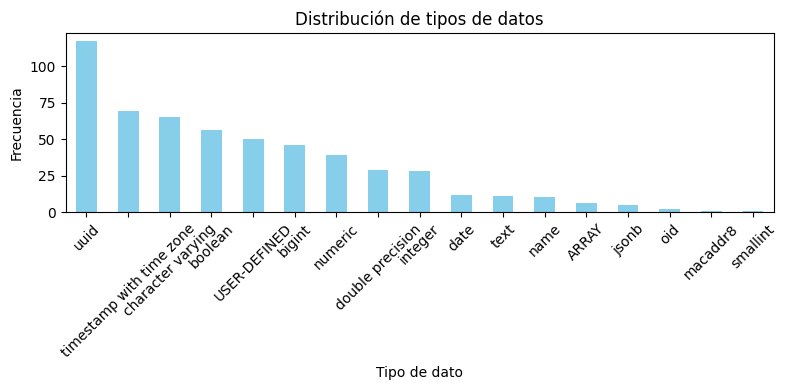

In [6]:
import matplotlib.pyplot as plt

df['data_type'].value_counts().plot.bar(figsize=(8,4), color='skyblue')
plt.title("Distribución de tipos de datos")
plt.xlabel("Tipo de dato")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📌 Conclusiones preliminares

- Se han detectado **46 tablas** con **547 columnas en total**.
- Los tipos de datos más frecuentes son:
  - `uuid` (117 columnas)
  - `timestamp with time zone` (69 columnas)
  - `character varying` (65 columnas)
  - `boolean` (56 columnas)
  - `USER-DEFINED` (50 columnas)
- Las tablas con más columnas son:
  - `Animals` (47 columnas)
  - `Devices` (36 columnas)
  - `pg_stat_statements` (33 columnas)
  - `pg_stat_kcache_detail` (32 columnas)
  - `Ranches` y `pg_stat_kcache` (29 columnas cada una)

Este análisis es útil para priorizar qué tablas explorar con más detalle en futuros análisis, ya sea por volumen, complejidad o tipología de los datos. Tablas como `Animals`, `Devices` o `Ranches` podrían ser especialmente relevantes para modelos analíticos y trazabilidad del ganado.
